In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D


In [3]:
mnist = tf.keras.datasets.mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [6]:
X_train.shape

(60000, 28, 28)

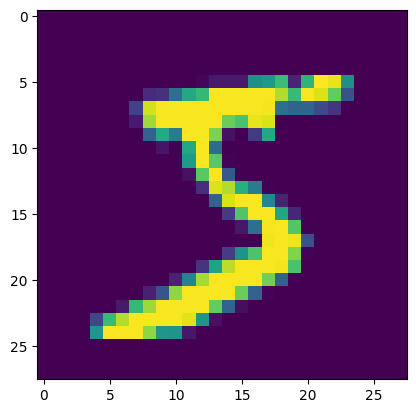

In [11]:
plt.imshow(X_train[0])

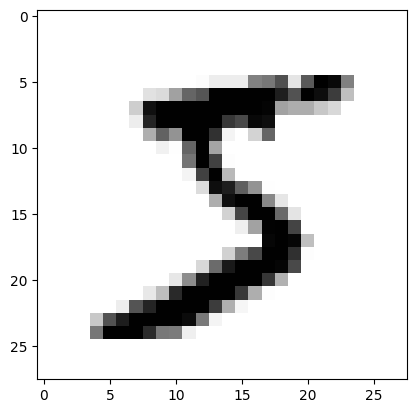

In [12]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

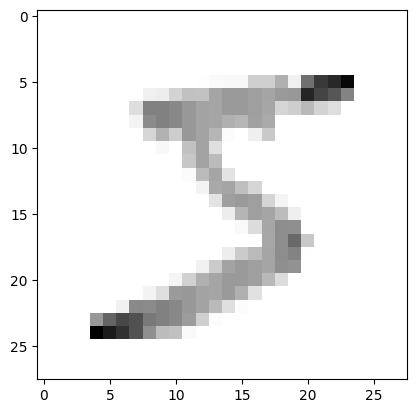

In [13]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [14]:
IMG_SIZE = 28
X_trainr = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE,1)
X_testr = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE,1)
print("Training samples ", X_trainr.shape)
print("Testing samples ", X_testr.shape)

Training samples  (60000, 28, 28, 1)
Testing samples  (10000, 28, 28, 1)


In [22]:
model = Sequential()
# sequential class is used to create the model, layers are added to the model one by one using the add() method

#The first layer is a Conv2D layer with 32 filters, each with a kernel size of 3x3, input shape is (28,28,1)
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (28,28,1)))
#MaxPool2D layer with a pool size of 2x2 is added to perform max pooling, which reduces the spatial dimensions of the output
model.add(MaxPool2D(pool_size=(2,2)))

#another Conv2D layer is added with the same parameters as the first one
#followed by another MaxPool2D layer
model.add(Conv2D(32, kernel_size=(3,3), input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten layer flattens the output from the previous layer
#which is then passed to a fully connected Dense layer with 256 neurons and a ReLU activation function

model.add(Flatten())
model.add(Dense(256, activation=tf.nn.relu))

#dropout layer randomly sets a fraction of the input units to 0 during training
# to prevent overfitting by reducing the interdependence of the neurons
# a dropout rate of 0.2 means that 20% of the input units are randomly set to 0 during each training batch.
model.add(Dropout(0.2))

#the output layer is a Dense layer with 10 neurons 
#a softmax activation function, which produces a probability distribution of 
#the 10 classes (0-9) in the MNIST dataset

model.add(Dense(10, activation=tf.nn.softmax))


In [24]:
model.summary()

# sparse_categorical_crossentropy used for multiclass classification problems where the target variable is integer-encoded

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=X_trainr, y = y_train, epochs = 10)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)              

In [27]:
model.evaluate(X_testr, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0607 - accuracy: 0.9878


[0.06073696166276932, 0.9878000020980835]

1/1 [==============================] - 0s 22ms/step
the predicted output is 
9


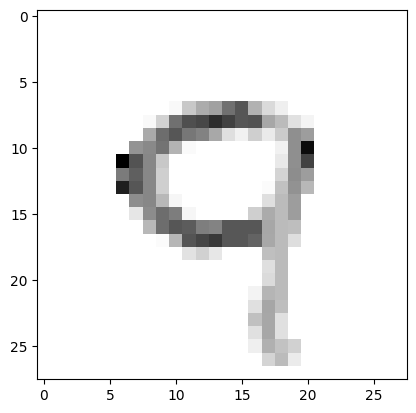

In [45]:
img_tag = 454
plt.imshow(X_testr[img_tag].reshape(28,28), cmap='Greys')
pred = model.predict(X_testr[img_tag].reshape(1,28,28,1))
print("the predicted output is ")
print(pred.argmax())